# Data wrangling

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=sns.load_dataset('titanic')
df.rename(columns={"sex": "gender"}, inplace=True)

In [3]:
df.drop(['deck'],axis=1,inplace=True)

In [4]:
df.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [6]:
#use loc function to select rows and columns by label
df.loc[0:4,'age':"fare"]

,age,sibsp,parch,fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


In [6]:
# use iloc function to select rows and columns by position
df.iloc[0:4,0:4]

,survived,pclass,gender,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0


In [7]:
# if we wanti to excess from 0 to 4 rows then 8 to 12 rows and 0 to 4 columns using loc function
df.loc[np.r_[0:4,8:12],['age','fare']]

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
8,27.0,11.1333
9,14.0,30.0708
10,4.0,16.7000
11,58.0,26.5500


In [8]:
# if we wanti to excess from 0 to 4 rows then 8 to 12 rows and 0 to 4 columns
df.iloc[np.r_[0:4,8:12],0:4]


,survived,pclass,gender,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
8,1,3,female,27.0
9,1,2,female,14.0
10,1,3,female,4.0
11,1,1,female,58.0


<Axes: xlabel='gender', ylabel='age'>

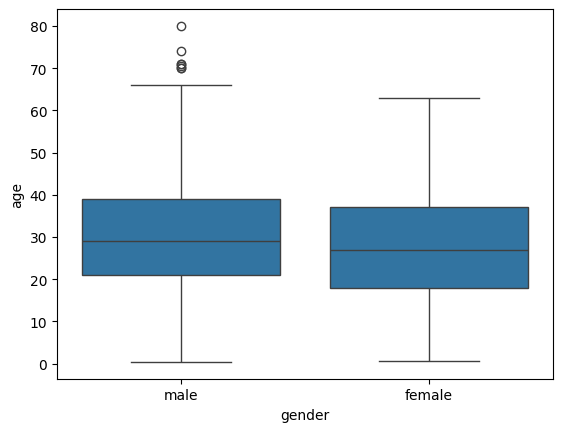

In [9]:
sns.boxplot(df, x='gender', y="age")

In [10]:
# Inter quartile range method
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75) 
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [11]:
df=df[(df['age']>lower_limit) & (df['age']<upper_limit)]

In [12]:
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75) 
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
df=df[(df['fare']>lower_limit) & (df['fare']<upper_limit)]

In [13]:
df.shape

(607, 14)

In [14]:
from scipy import stats

In [15]:
df_duplicates=df[df.duplicated()]
df_duplicates.shape

(38, 14)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(569, 14)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[['age','fare']]=scaler.fit_transform(df[['age','fare']])
df

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.339415,1,0,0.104618,S,Third,man,True,Southampton,no,False
2,1,3,female,0.402328,0,0,0.114358,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.543882,1,0,0.766234,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.543882,0,0,0.116162,S,Third,man,True,Southampton,no,True
6,0,1,male,0.842718,0,0,0.748377,S,First,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,0.433784,0,0,0.151515,S,Second,man,True,Southampton,no,True
885,0,3,female,0.606795,0,5,0.420274,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,0.292230,0,0,0.432900,S,First,woman,False,Southampton,yes,True
889,1,1,male,0.402328,0,0,0.432900,C,First,man,True,Cherbourg,yes,True


# Organizing the data

In [19]:
df["family"]=df['sibsp']+df['parch']

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 56.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='gender', ylabel='family'>

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 70.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


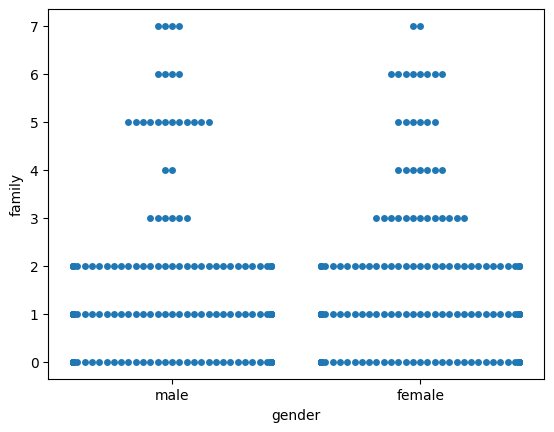

In [20]:
import seaborn as sns
sns.swarmplot(data=df, x="gender", y="family")

<Axes: xlabel='gender', ylabel='age'>

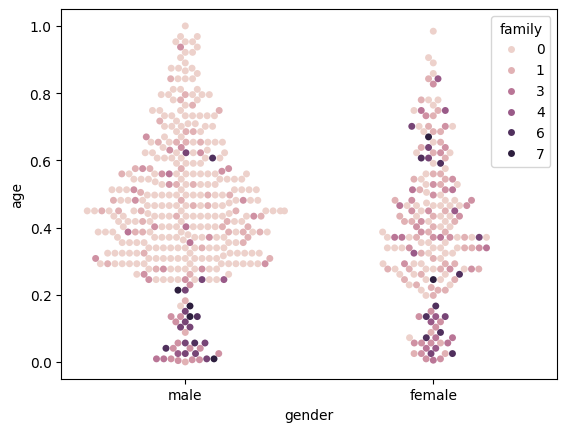

In [21]:
sns.swarmplot(data=df, x="gender", y="age",hue='family')

In [22]:
table=pd.pivot_table(df, values="fare", index="pclass", columns="survived", aggfunc=np.sum)
table

C:\Users\adeel\AppData\Local\Temp\ipykernel_8692\993106286.py:1: FutureWarning: The provided callable <function sum at 0x000001CF88A89940> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table=pd.pivot_table(df, values="fare", index="pclass", columns="survived", aggfunc=np.sum)


survived,0,1
pclass,,
1,18.712059,30.313496
2,19.191137,25.745071
3,48.812706,15.325999


# Feature Scaling

## 1. Min Max Scaling

In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Sample data
data = {'numbers': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)
df.head()

,numbers
0,10
1,20
2,30
3,40
4,50


In [24]:
# scale the data using min max scalar
scaler = MinMaxScaler()
df['numbers_scaled'] = scaler.fit_transform(df[['numbers']])
df.head()

,numbers,numbers_scaled
0,10,0.00
1,20,0.25
2,30,0.50
3,40,0.75
4,50,1.00


# 2. Standard Scalar or Z-score normalization

In [25]:
# scale the data using standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['numbers_scaled'] = scaler.fit_transform(df[['numbers']])
df.head()

,numbers,numbers_scaled
0,10,-1.414214
1,20,-0.707107
2,30,0.000000
3,40,0.707107
4,50,1.414214


## 3. Robust scalar

In [26]:
from sklearn.preprocessing import RobustScaler
# Sample data with outliers

# Robust Scaling
scaler = RobustScaler()
df['numbers_scaled'] = scaler.fit_transform(df[['numbers']])
print(df)

   numbers  numbers_scaled
0       10            -1.0
1       20            -0.5
2       30             0.0
3       40             0.5
4       50             1.0


# 4. Logrithmic scaling/ Normalization

In [27]:
import numpy as np
import pandas as pd

#random data with outliers

# Log Transform
df['numbers_log'] = np.log(df['numbers'])
df['numbers_log2'] = np.log2(df['numbers'])
df['numbers_log10'] = np.log10(df['numbers'])
df.head()

,numbers,numbers_scaled,numbers_log,numbers_log2,numbers_log10
0,10,-1.0,2.302585,3.321928,1.000000
1,20,-0.5,2.995732,4.321928,1.301030
2,30,0.0,3.401197,4.906891,1.477121
3,40,0.5,3.688879,5.321928,1.602060
4,50,1.0,3.912023,5.643856,1.698970


# Feature Encoding


1. One hot encoding

In [28]:
import pandas as pd
# Sample data
data = {'Color': ['Red', 'Green', 'Blue', 'Red']}
df = pd.DataFrame(data)
print(df)
# One-Hot Encoding
encoded_data = pd.get_dummies(df, columns=['Color'])
print(encoded_data)

   Color
0    Red
1  Green
2   Blue
3    Red
   Color_Blue  Color_Green  Color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False        False       True


2. Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
# Sample data
data = {'Animal': ['Dog', 'Cat', 'Bird', 'Dog', "lion"]}
df = pd.DataFrame(data)
print(df)

# Label Encoding
label_encoder = LabelEncoder()
df['Animal_encoded'] = label_encoder.fit_transform(df['Animal'])
print(df)

  Animal
0    Dog
1    Cat
2   Bird
3    Dog
4   lion
  Animal  Animal_encoded
0    Dog               2
1    Cat               1
2   Bird               0
3    Dog               2
4   lion               3


# 3.Ordinal Encoding

In [30]:
from sklearn.preprocessing import OrdinalEncoder
# Sample data
data = {'Size': ['Small', 'Medium', 'Large', 'Medium']}
df = pd.DataFrame(data)
print(df)

# Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[['Small', 'Medium', 'Large']])
df['Size_encoded'] = ordinal_encoder.fit_transform(df[['Size']])
print(df)

     Size
0   Small
1  Medium
2   Large
3  Medium
     Size  Size_encoded
0   Small           0.0
1  Medium           1.0
2   Large           2.0
3  Medium           1.0
